### Import Libs

In [1]:
#### Import Libs ####
import numpy

from matplotlib import pyplot as plt
from osgeo import gdal

try:
  import rasterio
except:
  print('installing rasterio')
  !pip install rasterio
  import rasterio


installing rasterio
     |████████████████████████████████| 15.1MB 4.7MB/s 


### Opening Images

Opening images ...
Opened /vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B1.tif?raw=true!
Opened /vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B2.tif?raw=true!
Opened /vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B3.tif?raw=true!
Opened /vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B4.tif?raw=true!
Array size: (3735, 1742)
min value:8.505576988682151e-05 max value:9137.2548828125


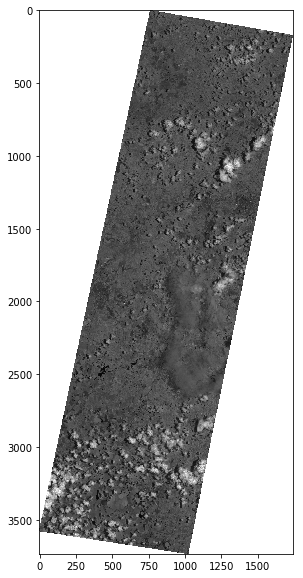

In [127]:
#### Opening Images ####
filename_blue = '/vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B1.tif?raw=true'
filename_green = '/vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B2.tif?raw=true'
filename_red = '/vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B3.tif?raw=true'
filename_nir = '/vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_B4.tif?raw=true'

print ( "Opening images ..." )
### open blue
try:
  ds_blue = gdal.Open(filename_blue, gdal.GA_ReadOnly)
  print ("Opened {}!".format(filename_blue))
except:
  print("Error opening file {}".format(filename_blue) )
### open green
try:
  ds_green = gdal.Open(filename_green, gdal.GA_ReadOnly)
  print ("Opened {}!".format(filename_green))
except:
  print("Error opening file {}".format(filename_green) )
### open red
try:
  ds_red = gdal.Open(filename_red, gdal.GA_ReadOnly)
  print ("Opened {}!".format(filename_red))
except:
  print("Error opening file {}".format(filename_red) )
### open nir
try:
  ds_nir = gdal.Open(filename_nir, gdal.GA_ReadOnly)
  print ("Opened {}!".format(filename_nir))
except:
  print("Error opening file {}".format(filename_nir) )

### read raster band, as numpy matrix
img_blue = ds_blue.GetRasterBand(1).ReadAsArray()
img_green = ds_green.GetRasterBand(1).ReadAsArray()
img_red   = ds_red.GetRasterBand(1).ReadAsArray()
img_nir   = ds_nir.GetRasterBand(1).ReadAsArray()
print('Array size: {}'.format(img_nir.shape) )
print('min value:{} max value:{}'.format( numpy.nanmin(img_nir[img_nir != -numpy.inf]) , numpy.nanmax(img_nir) ))

### Plot image
plt.figure(figsize=(10, 10))
plt.imshow(img_nir,cmap = 'gray')
plt.show()

## Cloud and Cloud Shadow Detection

### Cloud Detection

#### Normalized Difference Vegetation Index (NDVI)

NDVI


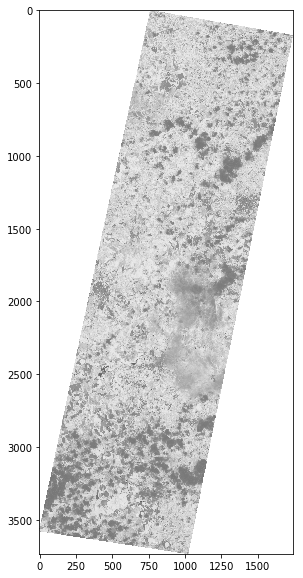

min value:-0.9999996423721313 max value:1.0


In [70]:
#### Cloud Detection ####
### Calculate NDVI
def calc_ndvi(red, nir):
  ndvi = (nir - red)/(nir + red)
  return ndvi

img_ndvi = calc_ndvi(img_red, img_nir)

numpy.warnings.filterwarnings('ignore')

print("NDVI")
plt.figure(figsize=(10, 10))
plt.imshow(img_ndvi,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format(numpy.nanmin(img_ndvi), numpy.nanmax(img_ndvi)))

NDVI - Cloud Mask


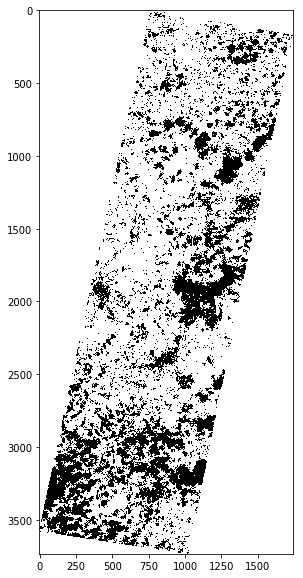

NDVI_mask: min value:1.0 max value:1.0


In [88]:
def apply_threshold(img, threshold_min, threshold_max):
  mask = numpy.copy(img) #only to fill
  mask[mask < threshold_min] = numpy.nan
  mask[mask > threshold_max] = numpy.nan
  mask[ numpy.invert( numpy.isnan(mask) )] = 1
  return mask

img_ndvi_mask = apply_threshold(img_ndvi, -1, 0.4)

print("NDVI - Cloud Mask")
plt.figure(figsize=(10, 10))
plt.imshow(img_ndvi_mask,cmap = 'gray')
plt.show()
print('NDVI_mask: min value:{} max value:{}'.format(numpy.nanmin(img_ndvi_mask), numpy.nanmax(img_ndvi_mask)))

#### Whitness Index (WI)

NDVI: min value:-0.9999996423721313 max value:1.0
WI - Whitness Index


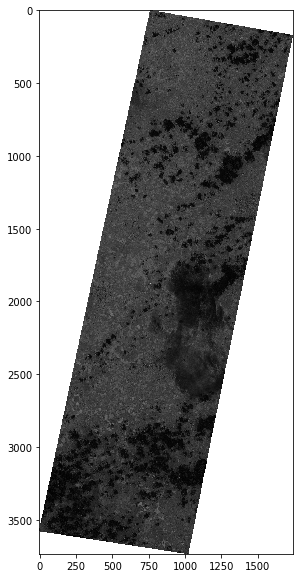

min value:0.0 max value:2.846153736114502


In [89]:
print('NDVI: min value:{} max value:{}'.format(numpy.nanmin(img_ndvi), numpy.nanmax(img_ndvi)))
### Calculate M
def calc_m(blue, green, red):
  m = 0.25*blue + 0.375*green + 0.375*red
  return m

### Calculate WI
def calc_wi(blue, green, red):
  m = calc_m(blue, green, red)
  wi = ( numpy.absolute( (blue -m)/m ) + 
         numpy.absolute( (green -m)/m ) + 
         numpy.absolute( (red -m)/m )
       )
  return wi



img_wi = calc_wi(img_blue, img_green, img_red)
print("WI - Whitness Index")
plt.figure(figsize=(10, 10))
plt.imshow(img_wi,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format(numpy.nanmin(img_wi), numpy.nanmax(img_wi)))


WI - Cloud Mask


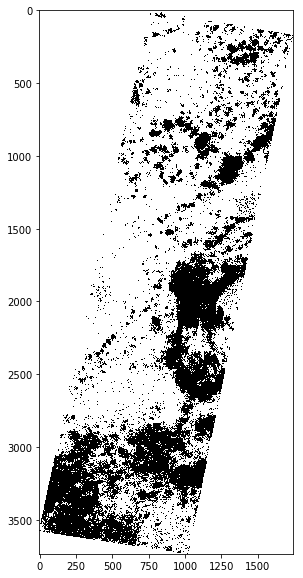

min value:1.0 max value:1.0


In [90]:
img_wi_mask = apply_threshold(img_wi, 0, 0.5)


print("WI - Cloud Mask")
plt.figure(figsize=(10, 10))
plt.imshow(img_wi_mask,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format(numpy.nanmin(img_wi_mask), numpy.nanmax(img_wi_mask)))

#### Haze Optimized Transformation (HOT)

HOT - Haze Optimized Transformation


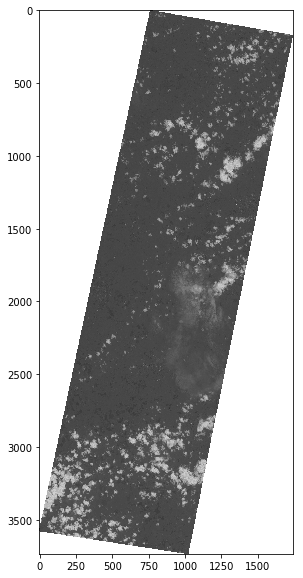

min value:-1654.9818115234375 max value:4550.900390625


In [91]:
### Calculate HOT
def calc_hot(blue, red):
  hot = blue -0.45*red - 0.08
  return hot

img_hot = calc_hot(img_blue, img_red)
print("HOT - Haze Optimized Transformation")
plt.figure(figsize=(10, 10))
plt.imshow(img_hot,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format(numpy.nanmin(img_hot), numpy.nanmax(img_hot)))

HOT - Cloud Mask


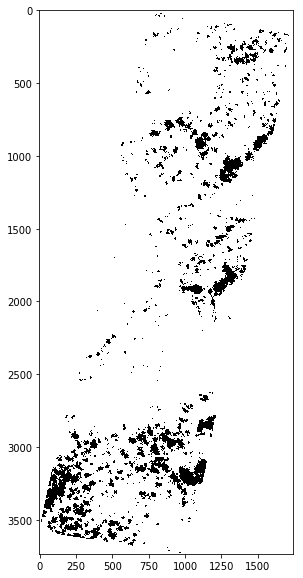

min value:1.0 max value:1.0


In [108]:
img_hot_mask = apply_threshold(img_hot, 1000, 4551)

print("HOT - Cloud Mask")
plt.figure(figsize=(10, 10))
plt.imshow(img_hot_mask,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format(numpy.nanmin(img_hot_mask), numpy.nanmax(img_hot_mask)))

#### Calculate Cloud Mask

NDVI_MASK: min value:1.0 max value:1.0
WI_MASK: min value:1.0 max value:1.0
HOT_MASK: min value:1.0 max value:1.0
Cloud - Mask


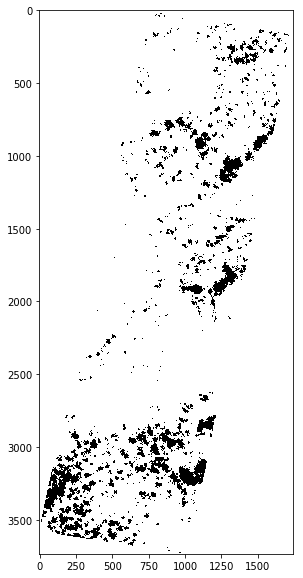

NDVI_MASK: min value:1.0 max value:1.0


In [137]:
### Calculate Cloud
def calc_cloud(ndvi_mask, wi_mask, hot_mask):
  cloud_mask = ndvi_mask * wi_mask * hot_mask
  return cloud_mask

print('NDVI_MASK: min value:{} max value:{}'.format(numpy.nanmin(img_ndvi_mask), numpy.nanmax(img_ndvi_mask)))
print('WI_MASK: min value:{} max value:{}'.format(numpy.nanmin(img_wi_mask), numpy.nanmax(img_wi_mask)))
print('HOT_MASK: min value:{} max value:{}'.format(numpy.nanmin(img_hot_mask), numpy.nanmax(img_hot_mask)))
c_mask = calc_cloud(img_ndvi_mask, img_wi_mask, img_hot_mask)
print("Cloud - Mask")
plt.figure(figsize=(10, 10))
plt.imshow(c_mask,cmap = 'gray')
plt.show()
print('NDVI_MASK: min value:{} max value:{}'.format(numpy.nanmin(c_mask), numpy.nanmax(c_mask)))


### Cloud Shadow Detection

#### Dark Pixel Mask (D)

(3735, 1742)
MinValBlue: 3.7901177165622357e-06
thBlue:2000
Blue Values must be < : 2000.0000037901177
MinValNir: 8.505576988682151e-05
thNir:2000
Nir Values must be < : 2000.00008505577
D - Dark pixel mask


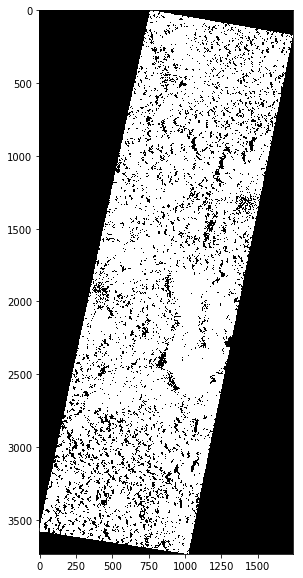

min value:1.0 max value:1.0


In [135]:
#### Cloud Shadow Detection ####
### Calculate D
def calc_d(blue, nir, blue_th = None, nir_th = None):
  minval_blue = numpy.nanmin( blue[blue != -numpy.inf] )
  print("MinValBlue: {}".format(minval_blue))
  print("thBlue:{}".format(blue_th) )
  print("Blue Values must be < : {}".format( minval_blue + blue_th ) )
  d2 = numpy.copy(blue)
  d2[d2 > (minval_blue + blue_th)] = numpy.nan
  d2[ numpy.invert( numpy.isnan(d2) )] = 1

  minval_nir = numpy.nanmin( nir[nir != -numpy.inf] )
  print("MinValNir: {}".format(minval_nir))
  print("thNir:{}".format(nir_th) )
  print("Nir Values must be < : {}".format( minval_nir + nir_th ) )
  d4 = numpy.copy(nir)
  d4[d4 > (minval_nir + nir_th)] = numpy.nan
  d4[ numpy.invert( numpy.isnan(d4) )] = 1

  return d2 * d4

print(img_blue.shape)
img_d = calc_d(img_blue, img_nir, 2000, 2000)
print("D - Dark pixel mask")
plt.figure(figsize=(10, 10))
plt.imshow(img_d,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format( numpy.nanmin(img_d[img_d != -numpy.inf]) , numpy.nanmax(img_d) ))



#### Water Mask (W)

W - Water pixel mask


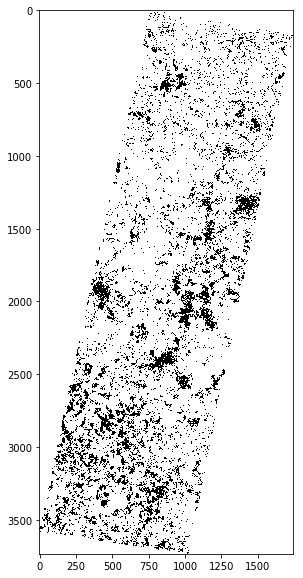

In [139]:
### Calculate W
def calc_w(red, nir, ndvi_th_clean = 0.3, p_th_clean = 2000, ndvi_th_turbid = 0.4, p_th_turbid = 3000):
  ndvi = calc_ndvi(red, nir)
  #w = (ndvi < ndviclean and b4 < pclean) or ((ndvi < ndvi turbid) and (b4 < pturbid))
  ndvi_clean = numpy.copy( ndvi )
  ndvi_clean[ ndvi_clean > ndvi_th_clean] = numpy.nan
  nir_clean = numpy.copy( nir )
  nir_clean[nir_clean > p_th_clean] = numpy.nan
  cond1 = ndvi_clean * nir_clean
  
  ndvi_turbid = numpy.copy( ndvi )
  ndvi_turbid[ ndvi_turbid > ndvi_th_turbid] = numpy.nan
  nir_turbid = numpy.copy( nir )
  nir_turbid[nir_turbid > p_th_turbid] = numpy.nan
  cond2 = ndvi_turbid * nir_turbid
  
  cond1[numpy.invert( numpy.isnan( cond1) )] = 1
  indices = [numpy.invert( numpy.isnan( cond2) )]
  cond1[indices] = 1
  return cond1

img_w = calc_w(img_red, img_nir)
# img_w = calc_d(img_red, img_nir, ndvi_th_clean, p_th_clean, ndvi_th_turbid, p_th_turbid)
print("W - Water pixel mask")
plt.figure(figsize=(10, 10))
plt.imshow(img_w,cmap = 'gray')
plt.show()



#### Difference image (Diff)

Opening images ...
Opened /vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20150830_155_124/098_CBERS_4_MUX_20150830_155_124_B4.tif?raw=true!
Array size: (3735, 1742)


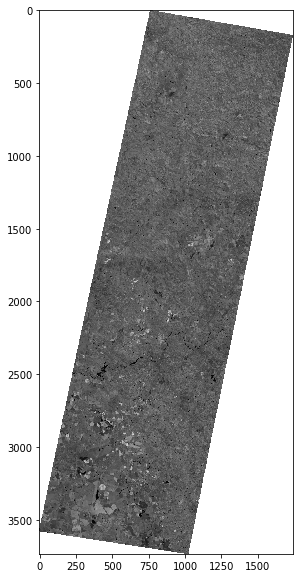

min value:78.43138122558594 max value:5176.470703125


In [143]:
#### Opening Images ####
filename_nir_ref = '/vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20150830_155_124/098_CBERS_4_MUX_20150830_155_124_B4.tif?raw=true'
print ( "Opening images ..." )
### open nir
try:
  ds_nir_ref = gdal.Open(filename_nir_ref, gdal.GA_ReadOnly)
  print ("Opened {}!".format(filename_nir_ref))
except:
  print("Error opening file {}".format(filename_nir_ref) )

### read raster band, as numpy matrix
img_nir_ref = ds_nir_ref.GetRasterBand(1).ReadAsArray()
print('Array size: {}'.format(img_nir_ref.shape) )

### Plot image
plt.figure(figsize=(10, 10))
plt.imshow(img_nir_ref,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format( numpy.nanmin(img_nir_ref[img_nir_ref != -numpy.inf]) , numpy.nanmax(img_nir_ref) ))

Diff - Image Diff


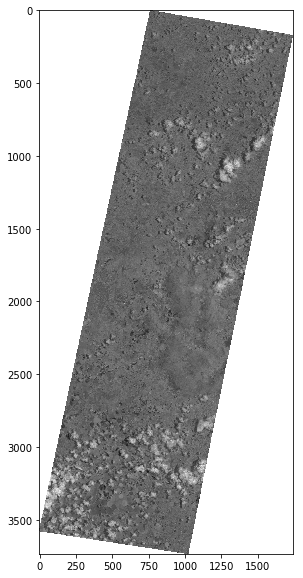

min value:-4078.431640625 max value:8392.15625


In [146]:
### Calculate Diff
def calc_diff(img_targ, img_ref):
  diff = img_targ - img_ref
  return diff

img_diff = calc_diff(img_nir, img_nir_ref)
print("Diff - Image Diff")
plt.figure(figsize=(10, 10))
plt.imshow(img_diff,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format( numpy.nanmin(img_diff[img_diff != -numpy.inf]) , numpy.nanmax(img_diff) ))

Diffmask


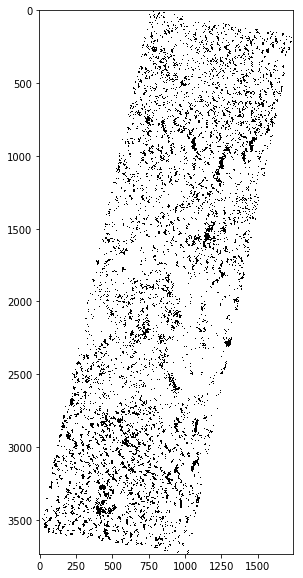

min value:1.0 max value:1.0


In [149]:
img_diff_mask = apply_threshold(img_diff, -5000, 0)

print("Diffmask")
plt.figure(figsize=(10, 10))
plt.imshow(img_diff_mask,cmap = 'gray')
plt.show()
print('min value:{} max value:{}'.format( numpy.nanmin(img_diff_mask[img_diff_mask != -numpy.inf]) , numpy.nanmax(img_diff_mask) ))

#### Calculate Cloud Shadow Mask

Cloud - Mask


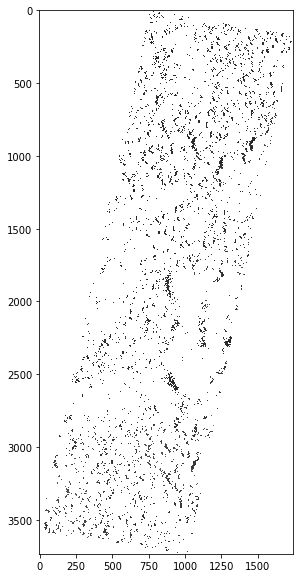

In [151]:
### Calculate Cloud Shadow
def calc_cloud_shadow(d, w, diff):
  #cs = d and not(w) and (diff < diffth)
  notw = numpy.copy(w)
  notw.fill(numpy.nan)
  indices_notw = numpy.isnan(w)
  notw[indices_notw] = 1
  
  cs = d * notw * diff
  return cs

cs_mask = calc_cloud_shadow(img_d, img_w, img_hot)
print("Cloud - Mask")
plt.figure(figsize=(10, 10))
plt.imshow(cs_mask,cmap = 'gray')
plt.show()

### Post Processing

In [0]:
import cv2 
#dilatação


### Validation

Opening images ...
Opened /vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_clouds.tif?raw=true!
Array size: (3735, 1742)
min value:0 max value:3


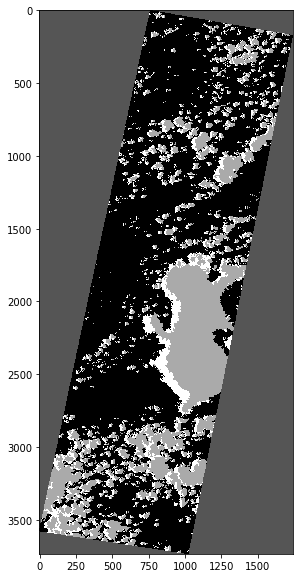

In [147]:
#Open reference cloud mask
#Compare result with reference 
# 0: free
# 1: out of extension
# 2: cloud
# 3: cloud shadow
filename_ref = '/vsicurl/https://github.com/marujore/TAPDI/blob/master/cloud_detection/images/098_CBERS_4_MUX_20151116_155_124/098_CBERS_4_MUX_20151116_155_124_clouds.tif?raw=true'

print ( "Opening images ..." )
try:
  ds_cloud = gdal.Open(filename_ref, gdal.GA_ReadOnly)
  print ("Opened {}!".format(filename_ref))
except:
  print("Error opening file {}".format(filename_ref) )

### read raster band, as numpy matrix
img_cloud_ref = ds_cloud.GetRasterBand(1).ReadAsArray()
print('Array size: {}'.format(img_cloud_ref.shape) )
print('min value:{} max value:{}'.format( numpy.nanmin(img_cloud_ref[img_cloud_ref != -numpy.inf]) , numpy.nanmax(img_cloud_ref) ))

### Plot image
plt.figure(figsize=(10, 10))
plt.imshow(img_cloud_ref,cmap = 'gray')
plt.show()